<a href="https://colab.research.google.com/github/Ashu-sarkar/CodSoft/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sales-prediction

Use the "Run" button to execute the code.

In [1]:
# Import Directories
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Import Data for processig
adv_data = pd.read_csv('/content/advertising.csv')

# Extracting Information about the data

In [6]:
# Top five data of the table
adv_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
# Bottom five data of the table
adv_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
adv_data.shape

(200, 4)

In [9]:
adv_data.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

# Applying process of Exploratory Data Analysis

In [29]:
a = adv_data['TV']
b = adv_data['Sales']

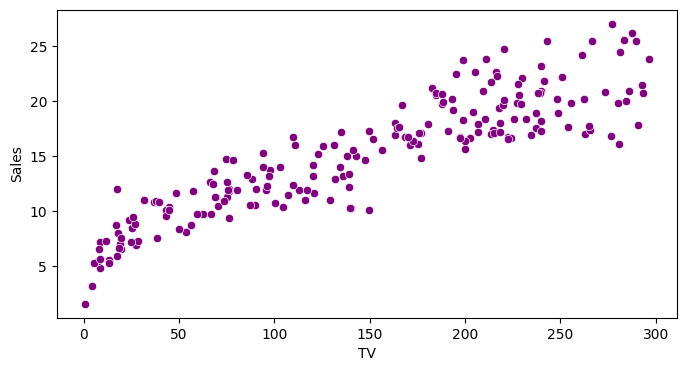

In [32]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=a, y=b, color='purple')
plt.show()

In [33]:
a = adv_data['Newspaper']
b = adv_data['Sales']

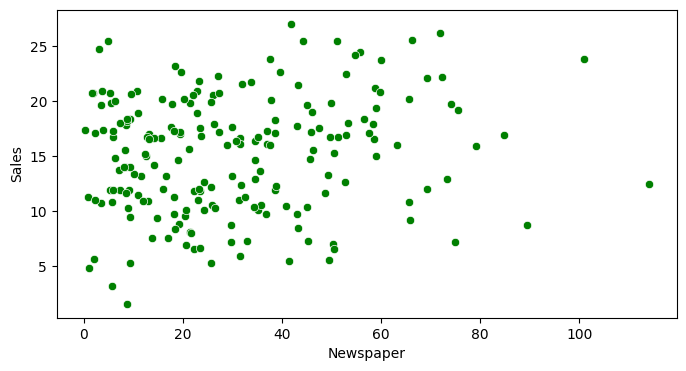

In [34]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=a, y=b, color='green')
plt.show()

In [36]:
a = adv_data['Radio']
b = adv_data['Sales']

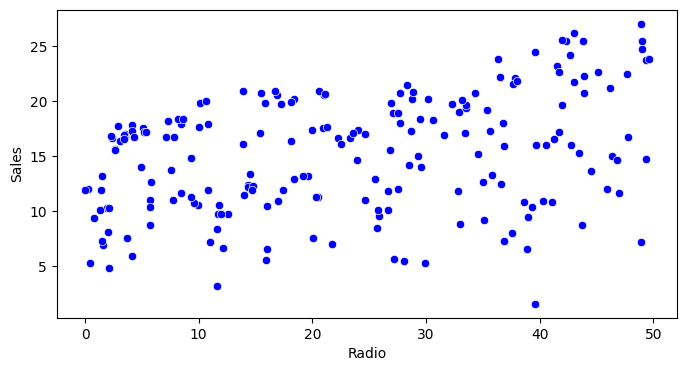

In [37]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=a, y=b, color='blue')
plt.show()

<Axes: >

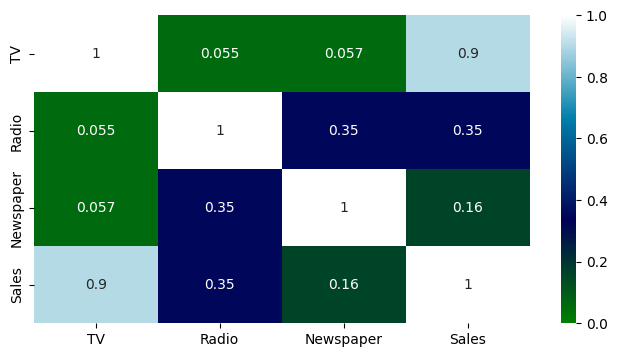

In [42]:
plt.figure(figsize=(8,4))
sns.heatmap(adv_data.corr(), annot=True,vmin=0,vmax=1,cmap='ocean')

# Statistical Analysis of the Data

In [45]:
adv_data.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.283892
dtype: float64

In [46]:
adv_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [47]:
adv_data.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

In [48]:
adv_data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         16.00
dtype: float64

#Applying the model of Linear Regression

In [84]:
 X = adv_data[['TV', 'Newspaper', 'Radio']]
 Y = adv_data[['Sales']]

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.8, random_state=20)

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [87]:
lr.intercept_

array([4.6481815])

In [88]:
lr.coef_

array([[0.05348737, 0.00424759, 0.10543652]])

# Splitting Dataset and Testing

In [90]:
print("The LR Model is: Y = ", lr.intercept_ ,"+", lr.coef_, 'TV', 'Newspaper', 'Radio')

The LR Model is: Y =  [4.6481815] + [[0.05348737 0.00424759 0.10543652]] TV Newspaper Radio


In [91]:
lr.score(X_train, Y_train)

0.9072147754110387

In [92]:
lr.score(X_test,Y_test)

0.8881441362855258

In [110]:
Y_pred = lr.predict(X_test)

In [107]:
Y_pred

array([[21.2848138 ],
       [20.91043783],
       [10.69509996],
       [19.7913078 ],
       [21.16845912],
       [18.90232327],
       [14.72365132],
       [10.23773588],
       [21.93399674],
       [ 7.14013076],
       [10.16898487],
       [14.15866575],
       [17.97295152],
       [ 9.66176635],
       [20.74507312],
       [24.79222836],
       [ 6.11475457],
       [16.34004211],
       [ 8.15579489],
       [ 6.13467773],
       [21.20485236],
       [18.0765751 ],
       [15.779286  ],
       [23.01086671],
       [20.45153144],
       [10.99006528],
       [18.00630747],
       [ 9.38179148],
       [10.58793644],
       [16.84560949],
       [ 9.94596581],
       [19.17387971],
       [ 8.8843535 ],
       [ 9.64302649],
       [24.86989537],
       [17.20103929],
       [ 9.84682929],
       [10.64145876],
       [11.69673326],
       [15.67982848]])

# Linear Regression output for Test and Train Data

<Axes: xlabel='Sales'>

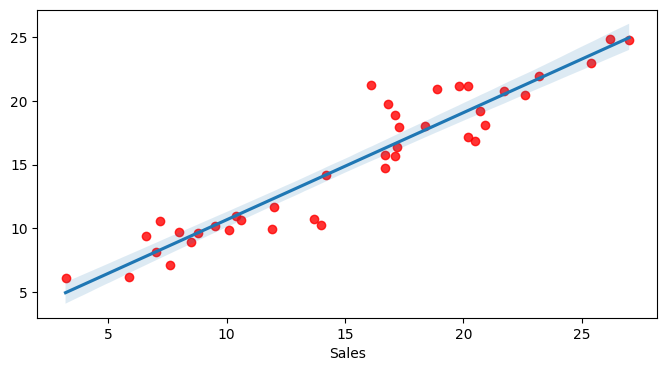

In [123]:
plt.figure(figsize=(8,4))
sns.regplot(x=Y_test, y=Y_pred, scatter_kws ={'color':'red'})

# The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.